In [38]:
#importação das bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 

In [39]:
#carregamento da base de dados da usina
geracao = pd.read_csv('/content/Plant_1_Generation_Data.csv')
clima = pd.read_csv('/content/Plant_1_Weather_Sensor_Data.csv')

In [40]:
#escopo geral da base de dados
geracao.head()
clima.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [41]:
#descrição do comportamento das varáveis dos dados
geracao.describe()
clima.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [42]:
a = geracao.isnull().sum()
b = clima.isnull().sum()
print(f'Quantidade de elemesntos nulo da geração:\n{a}')
print(f'Quantidade de elemesntos nulo ddo clima:\n{b}')

Quantidade de elemesntos nulo da geração:
DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
Quantidade de elemesntos nulo ddo clima:
DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [43]:
#Convertendo as datas para DateTime
geracao['DATE_TIME'] = pd.to_datetime(geracao['DATE_TIME'],format = '%d-%m-%Y %H:%M')
clima['DATE_TIME'] = pd.to_datetime(clima['DATE_TIME'],format = '%Y-%m-%d %H:%M')

In [44]:
#criando colunas para tempo e data
geracao['DATE'] = geracao['DATE_TIME'].apply(lambda x:x.date())
geracao['TIME'] = geracao['DATE_TIME'].apply(lambda x:x.time())
clima['DATE'] = clima['DATE_TIME'].apply(lambda x:x.date())
clima['TIME'] = clima['DATE_TIME'].apply(lambda x:x.time())

In [45]:
geracao.tail()
clima.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,2020-06-17,22:45:00
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,2020-06-17,23:00:00
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,2020-06-17,23:15:00
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,2020-06-17,23:30:00
3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,2020-06-17,23:45:00


Text(0.5, 0, 'Tempo')

<Figure size 720x360 with 0 Axes>

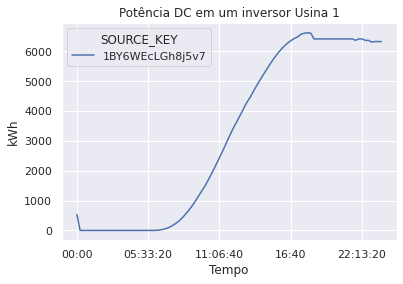

In [46]:
#GeraçãodosMódulosFV
geracao_dia = geracao.copy()
geracao_dia = geracao_dia.groupby(['TIME','SOURCE_KEY'])['DAILY_YIELD'].mean().unstack()
plt.figure(figsize=(10,5))
geracao_dia.iloc[:,0:1].plot()
plt.title('Potência DC em um inversor Usina 1')
plt.ylabel('kWh')
plt.xlabel('Tempo')


Text(0.5, 0, 'ID dos inversores')

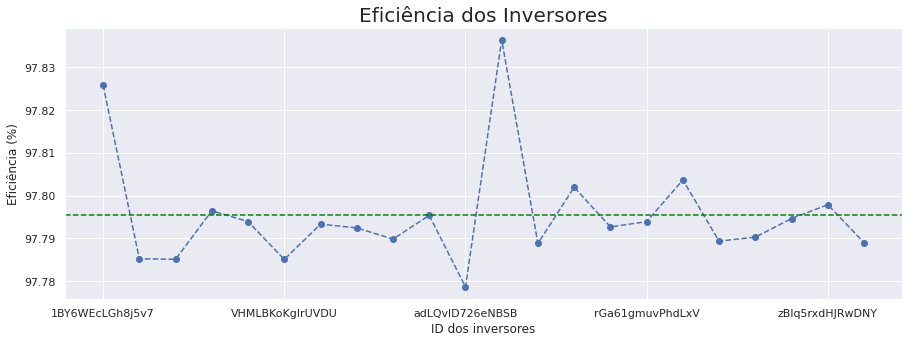

In [47]:
conv_Inv= geracao.groupby(['SOURCE_KEY']).mean()
eficiencia= conv_Inv['AC_POWER']*1000/conv_Inv['DC_POWER']
eficiencia.plot(figsize=(15,5), style='o--')
plt.axhline(eficiencia.mean(),linestyle='--',color='green')
plt.title('Eficiência dos Inversores', size=20)
plt.ylabel('Eficiência (%)')
plt.xlabel('ID dos inversores')

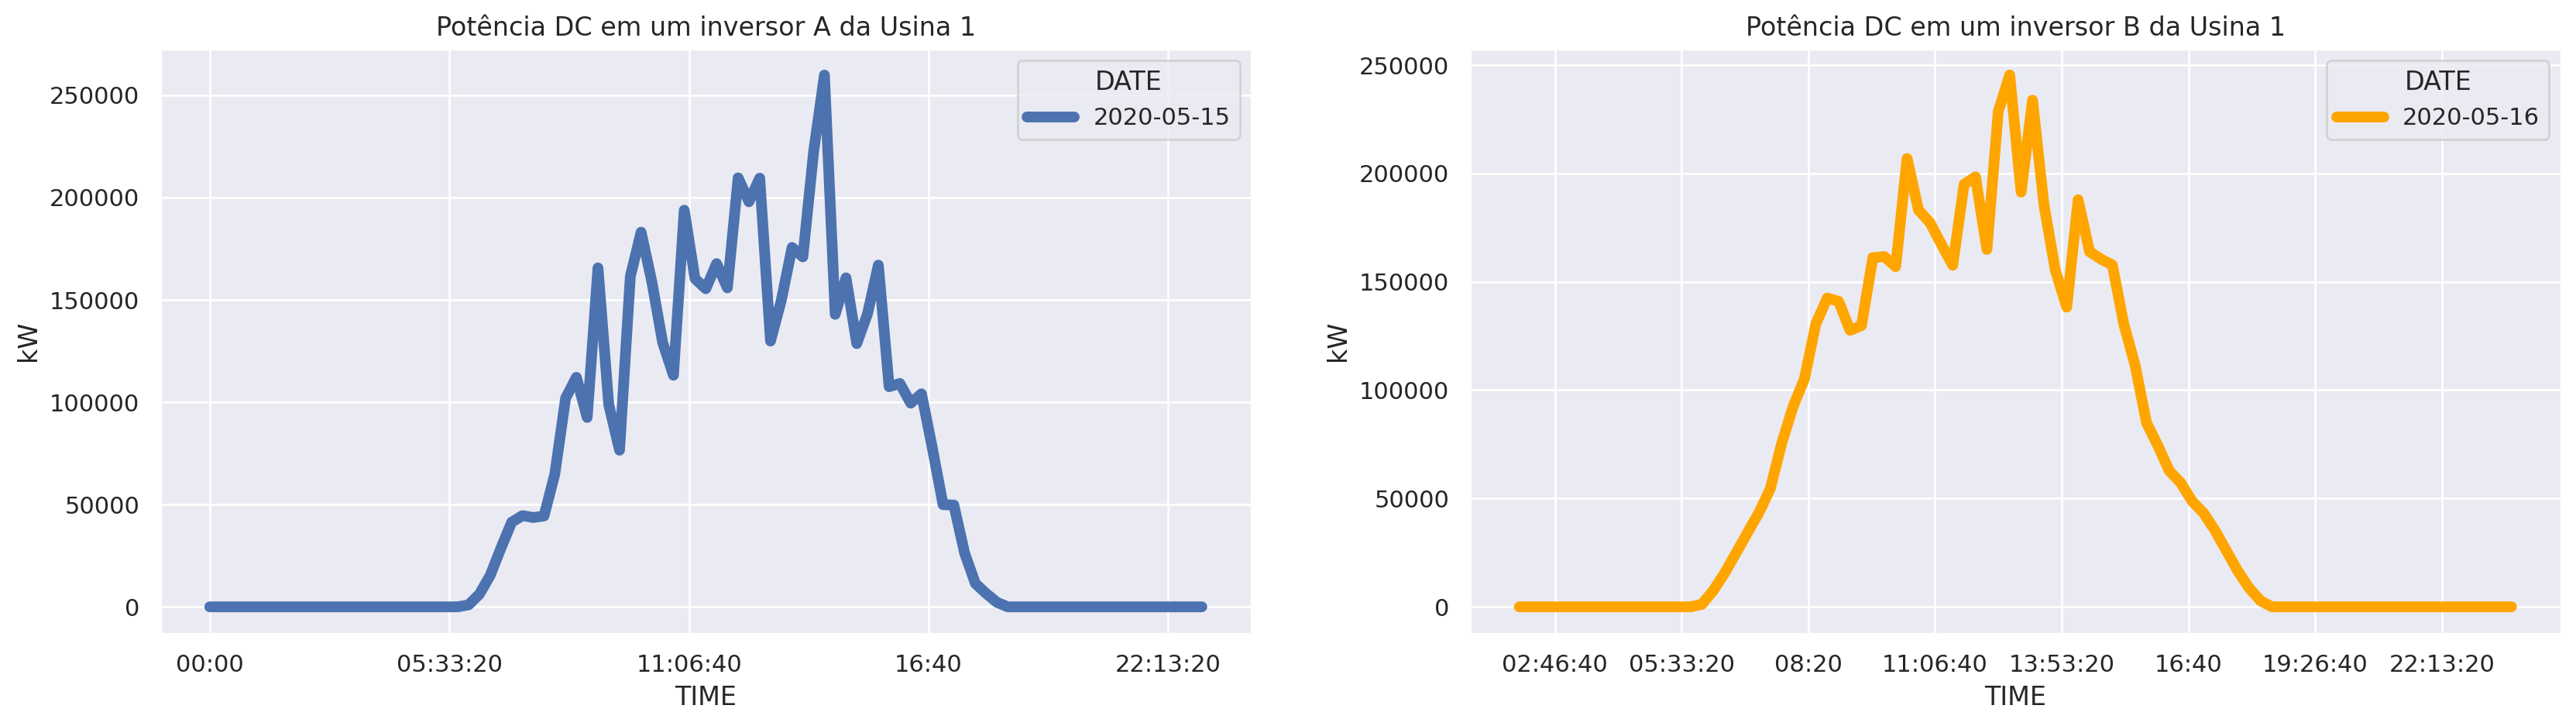

In [48]:
#potencia CC gerado pelos módulos
geracao_cc = geracao.copy()
geracao_cc = geracao_cc.groupby(['TIME','DATE'])['DC_POWER'].sum().unstack()

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=200,figsize=(20,5))
ax[0].set_title('Potência DC em um inversor A da Usina 1')
ax[0].set_ylabel('kW')
ax[0].set_xlabel('Tempo')
ax[1].set_title('Potência DC em um inversor B da Usina 1')
ax[1].set_ylabel('kW')
ax[1].set_xlabel('Tempo')
geracao_cc.iloc[:,0:1].plot(ax=ax[0],linewidth = 5)
geracao_cc.iloc[:,1:2].plot(ax=ax[1],linewidth = 5,color='orange')

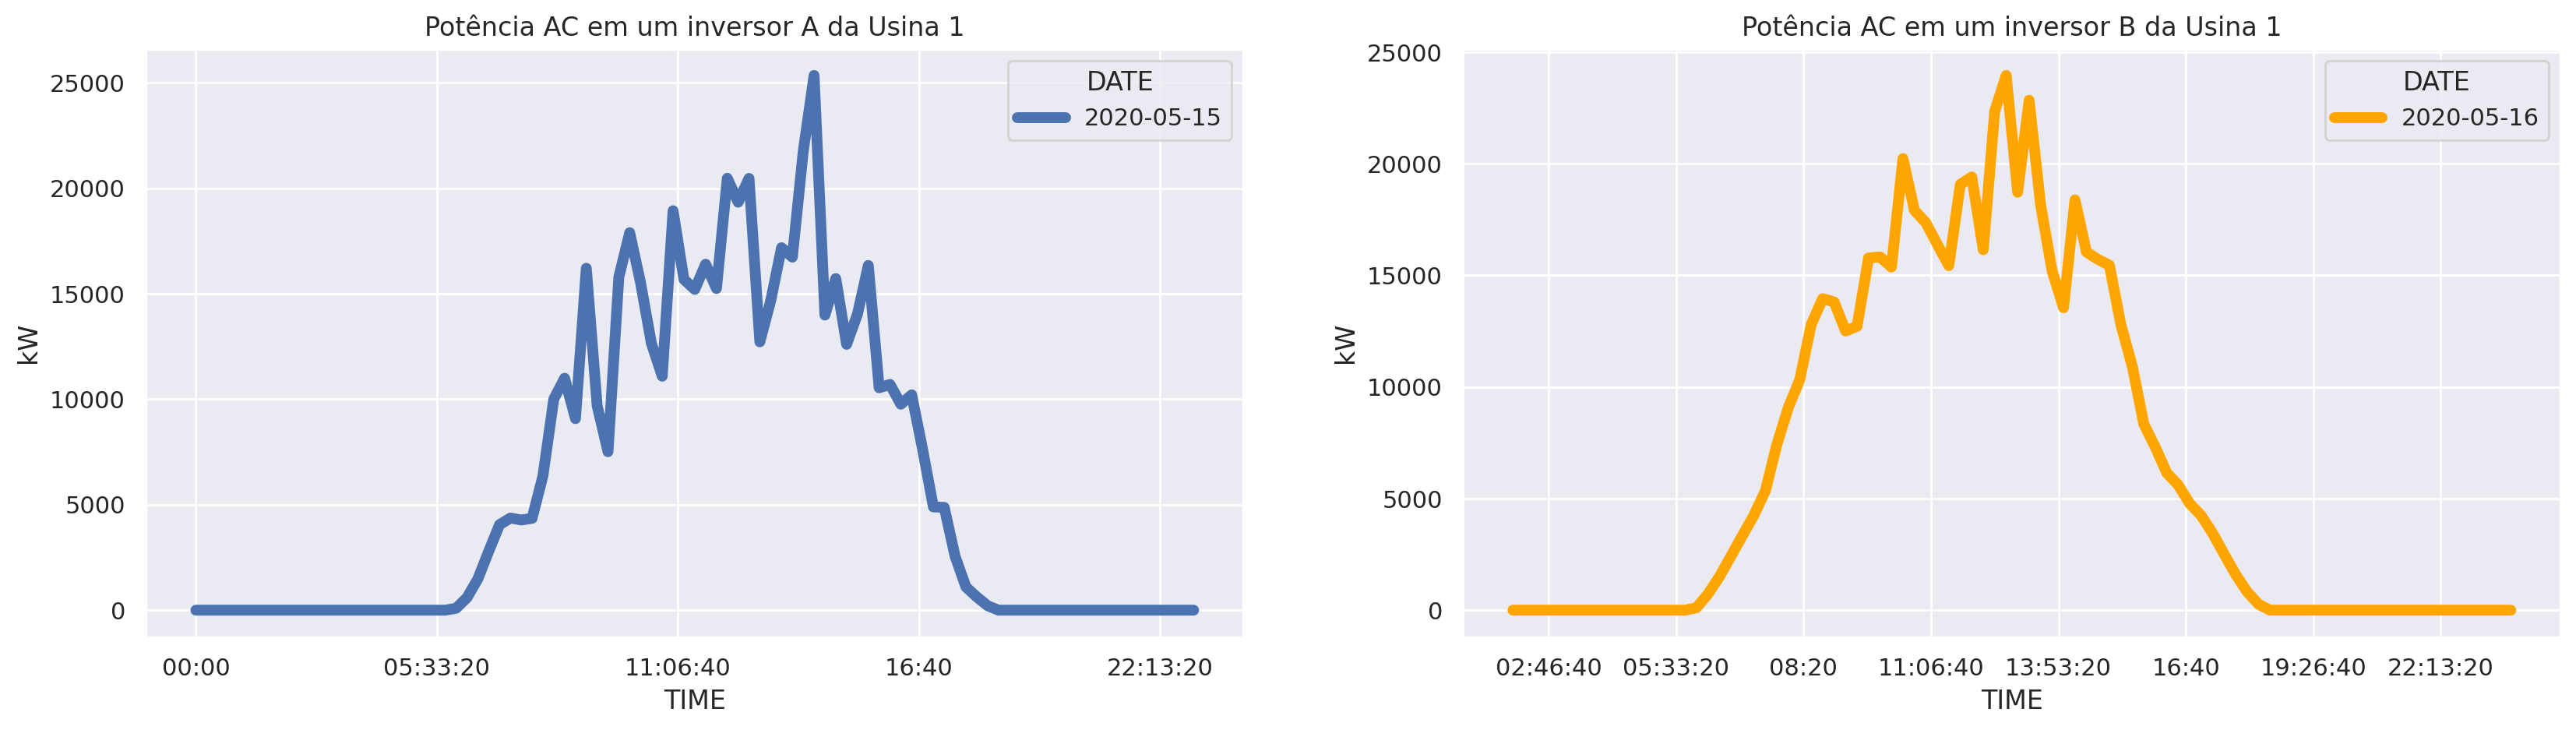

In [49]:
#potencia AC convertido pelo inversor
geracao_ac = geracao.copy()
geracao_ac = geracao_ac.groupby(['TIME','DATE'])['AC_POWER'].sum().unstack()

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=200,figsize=(20,5))
ax[0].set_title('Potência AC em um inversor A da Usina 1')
ax[0].set_ylabel('kW')
ax[0].set_xlabel('Tempo')
ax[1].set_title('Potência AC em um inversor B da Usina 1')
ax[1].set_ylabel('kW')
ax[1].set_xlabel('Tempo')
geracao_ac.iloc[:,0:1].plot(ax=ax[0],linewidth = 5)
geracao_ac.iloc[:,1:2].plot(ax=ax[1],linewidth = 5,color='orange')

In [50]:
#Agrupando os dados pela data
geracao_diaria = geracao.groupby(['DATE_TIME'],as_index=False).sum()
geracao_diaria.head()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,86835021,0.0,0.0,0.0,143581676.0
1,2020-05-15 00:15:00,86835021,0.0,0.0,0.0,143581676.0
2,2020-05-15 00:30:00,86835021,0.0,0.0,0.0,143581676.0
3,2020-05-15 00:45:00,86835021,0.0,0.0,0.0,143581676.0
4,2020-05-15 01:00:00,90970022,0.0,0.0,0.0,150761642.0


In [51]:
#selecionando as variaveis de estudo
geracao_select = geracao_diaria[['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD']]
geracao_select[45:50]

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD
45,2020-05-15 11:15:00,160301.226190,15683.713690,47752.761904
46,2020-05-15 11:30:00,155409.160714,15207.283929,51726.053571
47,2020-05-15 11:45:00,167668.196427,16401.589286,55271.107142
48,2020-05-15 12:00:00,155821.696428,15250.808333,59620.946429
49,2020-05-15 12:15:00,209569.398819,20477.017856,63932.303572


In [52]:
#drop da chave id da usina e do inversor que serão insgnificantes para a predição
clima_drop = clima.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
clima_drop.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,2020-05-15,01:00:00


In [53]:
#juntando dados de geração e clima
usine = pd.merge(geracao_select,clima_drop, how='inner', on='DATE_TIME')
usine_no_time = usine.drop(['DATE','TIME'],axis =1)
usine_no_time.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.0,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.0,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.0,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.0,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.0,24.621525,22.165423,0.0


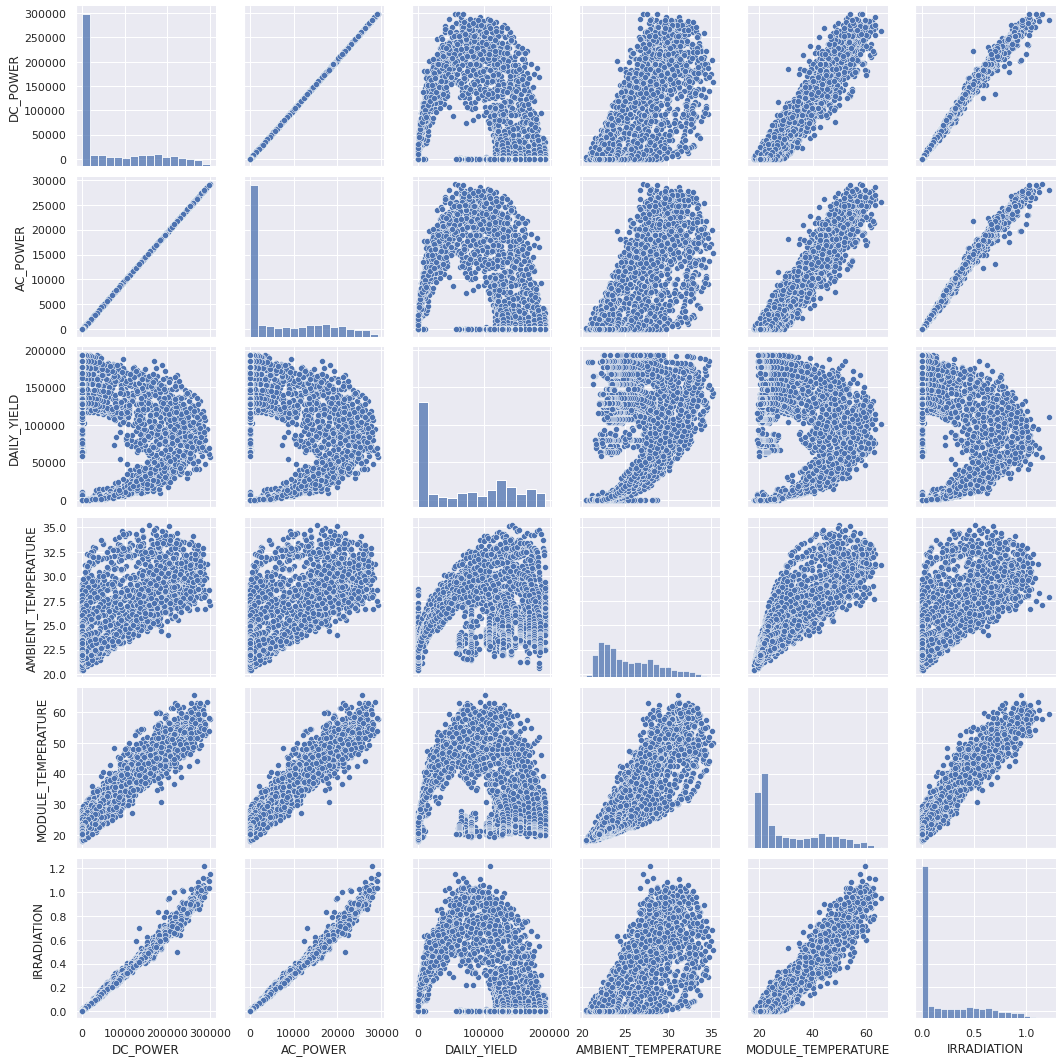

In [54]:
#insight da relação entre as variaveis
sns.pairplot(usine[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']])

Text(0, 0.5, 'DC POWER')

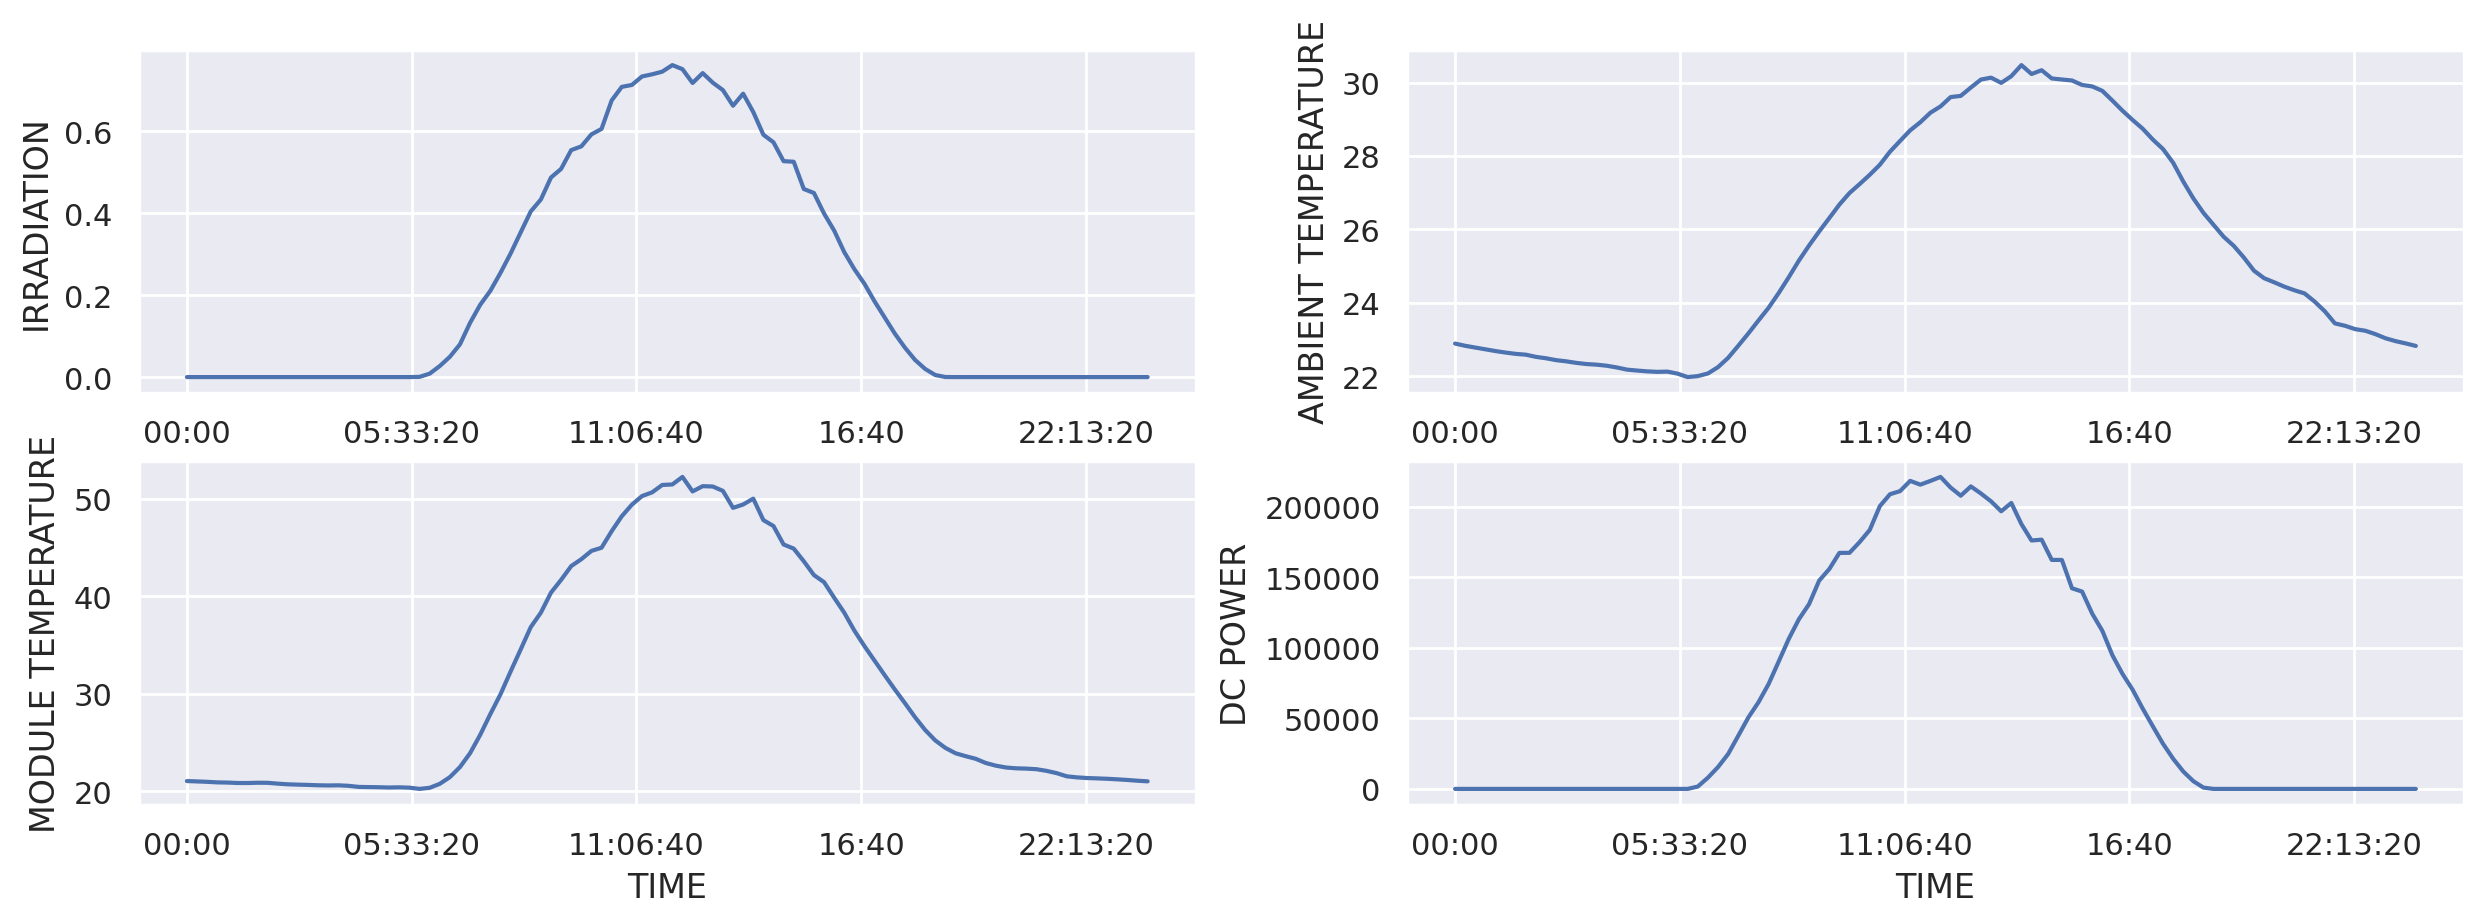

In [56]:
#observando o comportamento das variaveis de clima e da geração dos módulos FV
usine_clima = usine.copy()
clima_cc = usine_clima.groupby(['TIME']).mean()

fig,ax=plt.subplots(ncols=2,nrows=2,dpi=200,figsize=(15,5))
clima_cc['IRRADIATION'].plot(ax=ax[0,0])
clima_cc['AMBIENT_TEMPERATURE'].plot(ax=ax[0,1])
clima_cc['MODULE_TEMPERATURE'].plot(ax=ax[1,0])
clima_cc['DC_POWER'].plot(ax=ax[1,1])

ax[0,0].set_ylabel('IRRADIATION')
ax[0,1].set_ylabel('AMBIENT TEMPERATURE')
ax[1,0].set_ylabel('MODULE TEMPERATURE')
ax[1,1].set_ylabel('DC POWER')

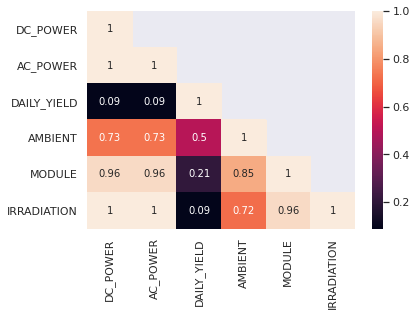

In [57]:
#Correlação entre as variaveis da usina para a escolha da mais apropriada para geração DC
usine_no_time.columns = ['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT','MODULE','IRRADIATION']
one_correlation = usine_no_time[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT','MODULE','IRRADIATION']]
corr = one_correlation.corr()

fig_dims = (2, 2) 
sns.heatmap(round(corr,2), annot=True, mask=(np.triu(corr,+1)))
plt.savefig('correla.png',format = 'png')

In [58]:
#após a escolha das variaveis com maior correlação, separação final da base de dados
base = usine[['DC_POWER','MODULE_TEMPERATURE','IRRADIATION']]
base.describe()
resultados = usine[['DC_POWER','DATE_TIME']]

In [59]:
#importação das bibliotecas da Rede Neural
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [112]:
#Selecionando a base de treinamento e teste
#sendo 70% para treinamento e 30% teste
base_treinamento = base[0:int(0.7*len(base))]
base_teste = base[int(0.7*len(base)):]
base_teste

,DC_POWER,MODULE_TEMPERATURE,IRRADIATION
2209,0.0,21.098448,0.0
2210,0.0,21.063776,0.0
2211,0.0,21.141337,0.0
2212,0.0,21.056901,0.0
2213,0.0,20.916248,0.0
...,...,...,...
3152,0.0,21.480377,0.0
3153,0.0,21.389024,0.0
3154,0.0,20.709211,0.0
3155,0.0,20.734963,0.0


In [61]:
#normalizando a base de dados e teste
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
normalizador_previsao = MinMaxScaler(feature_range=(0,1))
normalizador_previsao.fit_transform( base_treinamento.iloc[:,0:1])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [119]:
#criando listas dos atributos previsores e os valores reais para a RNA
previsores = []
real_dc = []
len(base_treinamento)

2209

In [120]:
#preenchendo essas listas
for i in range(100,len(base_treinamento)):
    previsores.append(base_treinamento_normalizada[i-100:i,0:3])
    real_dc.append(base_treinamento_normalizada[i,0])
len(real_dc)

2109

In [121]:
#trasnformando em array
previsores,real_dc = np.array(previsores),np.array(real_dc)
len(real_dc)

2109

In [66]:
#RNA LSTM COM DROPOUT PARA O OVERFITING
regressor = Sequential()
regressor.add(LSTM(units=100,return_sequences=True, input_shape =
                   (previsores.shape[1],3)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1,activation='sigmoid'))

regressor.compile(optimizer='adam',loss='mean_squared_error',
                  metrics = ['mean_absolute_error'])

es = EarlyStopping(monitor = 'loss', min_delta= 1e-10, patience=10, verbose = 1)
rlr = ReduceLROnPlateau(monitor='loss', factor = 0.2, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath= 'pesos.h5', monitor='loss', save_best_only=True,
                      verbose=1)


In [67]:
#TREINAMENTO
regressor.fit(previsores,real_dc,epochs=100,batch_size=32,
              callbacks=[es,rlr,mcp])

Epoch 1/100
132/132 [==============================] - 52s 217ms/step - loss: 0.0666 - mean_absolute_error: 0.1965

Epoch 00001: loss improved from inf to 0.03710, saving model to pesos.h5
Epoch 2/100
132/132 [==============================] - 29s 220ms/step - loss: 0.0156 - mean_absolute_error: 0.0818

Epoch 00002: loss improved from 0.03710 to 0.01466, saving model to pesos.h5
Epoch 3/100
132/132 [==============================] - 29s 219ms/step - loss: 0.0137 - mean_absolute_error: 0.0764

Epoch 00003: loss improved from 0.01466 to 0.01347, saving model to pesos.h5
Epoch 4/100
132/132 [==============================] - 29s 218ms/step - loss: 0.0115 - mean_absolute_error: 0.0698

Epoch 00004: loss improved from 0.01347 to 0.01178, saving model to pesos.h5
Epoch 5/100
132/132 [==============================] - 29s 218ms/step - loss: 0.0108 - mean_absolute_error: 0.0653

Epoch 00005: loss improved from 0.01178 to 0.01049, saving model to pesos.h5
Epoch 6/100
132/132 [==================

In [68]:
#Valores reais de teste
real_dc_teste = base_teste.iloc[:,0:1].values

In [70]:
#previsores de teste
dado_um = base[len(base) - len(base_teste) - 100:].values
dado_um = normalizador.transform(dado_um)

In [71]:
#preenchendo os valores de teste numa lista
X_teste = []
for v in range(100,len(dado_um)):
    X_teste.append(dado_um[v-100:v,0:6])
X_teste = np.array(X_teste)

In [72]:
#prevendo os valores e transformando a normalização para os numeros reais
previsoes = regressor.predict(X_teste)
previsoes = normalizador_previsao.inverse_transform(previsoes)

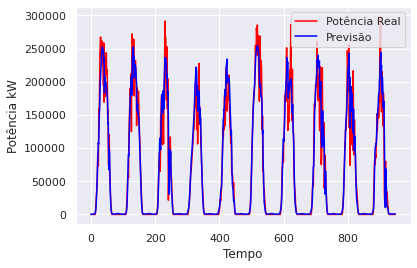

In [73]:
#Previsão da RNA
plt.plot(real_dc_teste,color='red',label = 'Potência Real')
plt.plot(previsoes,color='blue',label = 'Previsão')
plt.xlabel('Tempo')
plt.ylabel('Potência kW')
plt.legend()
plt.show()

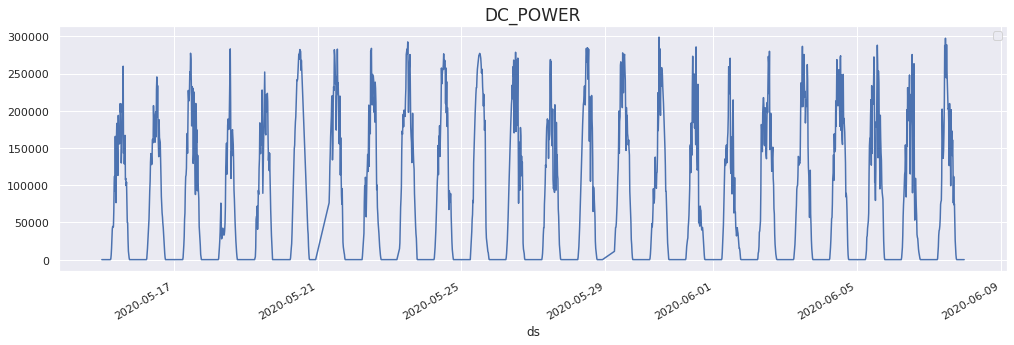

In [150]:
#Fazendo Previsão com FB prophet
from fbprophet import Prophet
pred_gen_all=usine.copy()
#agrupando e renomeando data e potência
pred_gen_all=pred_gen_all.groupby('DATE_TIME')['DC_POWER'].sum().reset_index()
pred_gen_all.rename(columns={'DATE_TIME':'ds','DC_POWER':'y'},inplace=True)
#plot da base de teste
pred_gen=pred_gen_all[pred_gen_all['ds']<'2020-06-08'].copy()
pred_gen_t=pred_gen_all[pred_gen_all['ds']>'2020-06-08'].copy()
pred_gen.plot(x='ds',y='y',figsize=(17,5))
plt.legend('')
plt.title('DC_POWER',size=17)
plt.show()

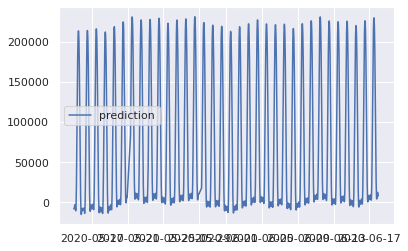

In [75]:
#fatores que o Prophet está levando em consideração da rede Neural
m = Prophet(yearly_seasonality=False,daily_seasonality=True)
#treinamento do FB prophet
m.fit(pred_gen)
future =m.make_future_dataframe(periods=10*24*4,freq='15min')
forecast = m.predict(future)
plt.plot(forecast.set_index('ds')['yhat'],label="prediction")
plt.legend()

In [76]:
#parametrizando para plotar com a RNA
v = forecast.set_index('ds')['yhat']
vf = v[int(0.70*len(v)):]

In [87]:
date = usine['DATE'].to_list()
date_teste = date[int(0.7*len(base)):]
date_teste = pd.DataFrame(date_teste)

In [132]:
date = usine['DATE'].to_list()
date_treinamento = date[0:int(0.7*len(base))]
date_treinamento = pd.DataFrame(date_treinamento)

2209

In [158]:
#ultmos ajustes antes do gráfico
df = pd.DataFrame(previsoes)
df.columns = ["DC_POWER"]
df = df.assign(DATE = date_teste)
df_real = pd.DataFrame(real_dc_teste)
df_real.columns = ["DC_POWER"]
df_real = df_real.assign(DATA = date_teste)
df_treinamento = pd.DataFrame(real_dc)
df_treinamento = df_treinamento.assign(DATA = date_treinamento)

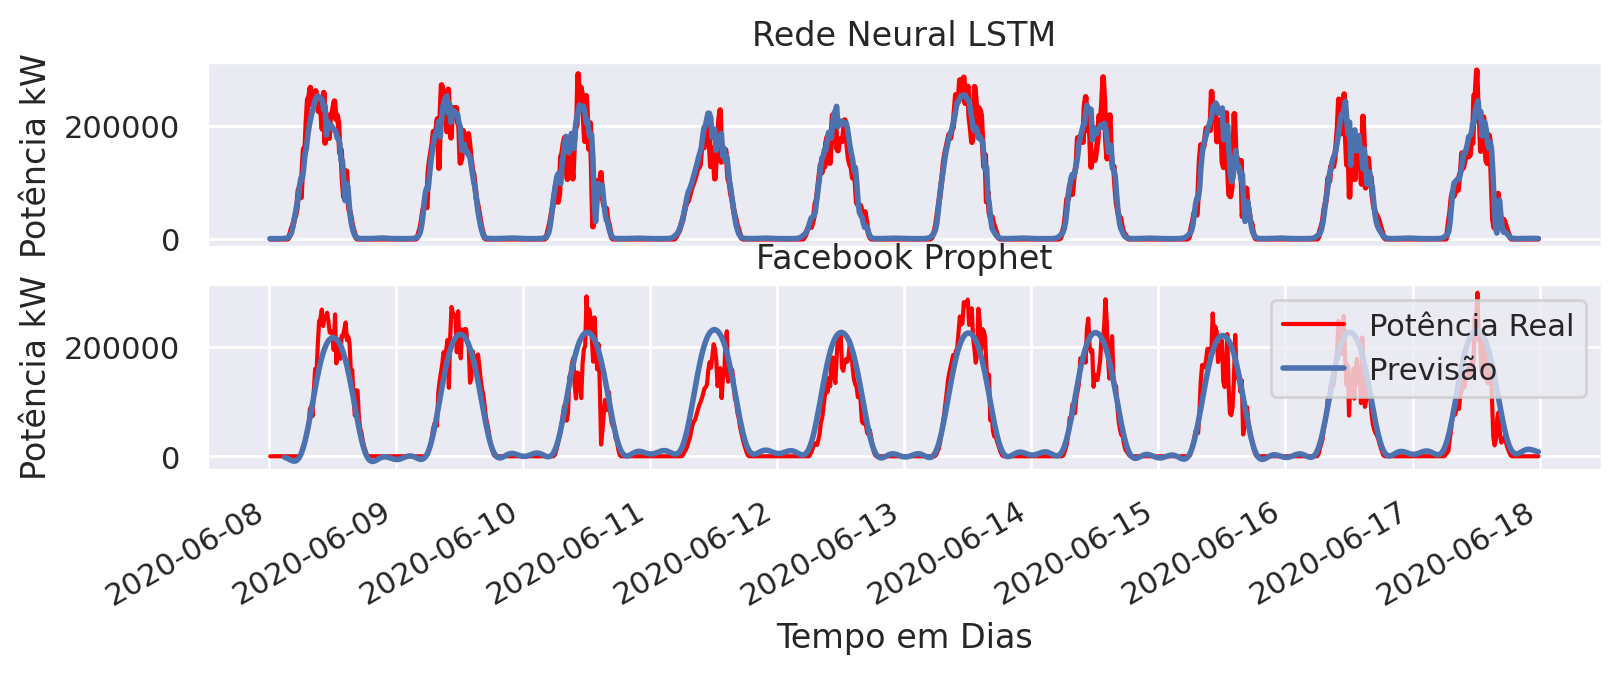

In [160]:
#gráfico comparativo entra a RNA E O Facebook Prophet
fig,ax=plt.subplots(ncols=1,nrows=2,dpi=200,figsize=(9,3))
df_real['DC_POWER'].plot(ax=ax[0], color = 'red', linewidth=2,label = 'Potência Real')
df['DC_POWER'].plot(ax=ax[0],linewidth=2, label =  'Previsão')
pred_gen_t.plot(ax = ax[1], x='ds',y='y',label='Potência Real',color = 'red')
vf.plot(ax=ax[1],linewidth=2, label = 'Previsão')
ax[0].axes.get_xaxis().set_visible(False)
ax[0].set_title('Rede Neural LSTM')
ax[1].set_title('Facebook Prophet')
ax[0].set_ylabel('Potência kW')
ax[1].set_ylabel('Potência kW')
ax[1].set_xlabel('Tempo em Dias')
plt.legend()

In [165]:
#Precissão
from sklearn.metrics import r2_score,mean_absolute_error

precisaoRNA = r2_score(real_dc_teste,previsoes)
precisaoFace = r2_score(vf,previsoes)

print(f'Precisão da RNA:{round(100*precisaoRNA,2)}%\n')
print(f'Precisão do Prophet:{round(100*precisaoFace,2)}%\n')

Precisão da RNA:93.28%

Precisão do Prophet:92.37%

